In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("Heart_Disease_Prediction (3).csv")

# Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

# Shape of dataset

In [4]:
dataset.shape

(270, 14)

# Printing out 5 columns

In [5]:
dataset.head(5)

,Age,Sex,ChestpainType,BP,Cholesterol,FBS,Ecg,MaxHR,ExerciseAngina,Stdepression,SlopeofST,NoV,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Sample() function returns random selection elements

In [6]:
dataset.sample(5)

,Age,Sex,ChestpainType,BP,Cholesterol,FBS,Ecg,MaxHR,ExerciseAngina,Stdepression,SlopeofST,NoV,Thallium,Target
143,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
186,56,1,4,132,184,0,2,105,1,2.1,2,1,6,1
165,64,0,4,180,325,0,0,154,1,0.0,1,0,3,0
58,59,0,4,174,249,0,0,143,1,0.0,2,0,3,1
47,44,1,4,110,197,0,2,177,0,0.0,1,1,3,1


# Describe() returns a description summary for each column in the DataFrame

In [7]:
dataset.describe()

,Age,Sex,ChestpainType,BP,Cholesterol,FBS,Ecg,MaxHR,ExerciseAngina,Stdepression,SlopeofST,NoV,Thallium,Target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


# Data Preprocessing

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             270 non-null    int64  
 1   Sex             270 non-null    int64  
 2   ChestpainType   270 non-null    int64  
 3   BP              270 non-null    int64  
 4   Cholesterol     270 non-null    int64  
 5   FBS             270 non-null    int64  
 6   Ecg             270 non-null    int64  
 7   MaxHR           270 non-null    int64  
 8   ExerciseAngina  270 non-null    int64  
 9   Stdepression    270 non-null    float64
 10  SlopeofST       270 non-null    int64  
 11  NoV             270 non-null    int64  
 12  Thallium        270 non-null    int64  
 13  Target          270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


# Let's understand our columns better:

In [9]:
info = ["Age","1: male, 0: female","Chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure in mm Hg","serum cholestoral in mg/dl"," resting electrocardiographic results,0:normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria","maximum heart rate achieved","exercise induced angina, 1 : yes, 0 : no","ST depression induced by exercise relative to rest","slope of the peak exercise ST segment, 1: upsloping, 2: flat,3: downsloping","number of major vessels (0-3) colored by flourosopy","3 : normal, 6 : fixed defect, 7 : reversable defect"," diagnosis of heart disease (angiographic disease status),0: < 50% diameter narrowing,1: > 50% diameter narrowing"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

Age:			Age
Sex:			1: male, 0: female
ChestpainType:			Chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
BP:			resting blood pressure in mm Hg
Cholesterol:			serum cholestoral in mg/dl
FBS:			 resting electrocardiographic results,0:normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
Ecg:			maximum heart rate achieved
MaxHR:			exercise induced angina, 1 : yes, 0 : no
ExerciseAngina:			ST depression induced by exercise relative to rest
Stdepression:			slope of the peak exercise ST segment, 1: upsloping, 2: flat,3: downsloping
SlopeofST:			number of major vessels (0-3) colored by flourosopy
NoV:			3 : normal, 6 : fixed defect, 7 : reversable defect
Thallium:			 diagnosis of heart disease (angiographic disease status),0: < 50% diameter narrowing,1: > 50% diameter narrowing


In [10]:
dataset["Target"].describe()

count    270.000000
mean       0.444444
std        0.497827
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Target, dtype: float64

In [11]:
dataset["Target"].unique()

array([1, 0], dtype=int64)

# This is a classification problem, with the Target variable having values '0' and '1'
##Checking correlation between columns

In [12]:
print(dataset.corr()["Target"].abs().sort_values(ascending=False))

Target            1.000000
Thallium          0.525020
NoV               0.455336
ExerciseAngina    0.419303
MaxHR             0.418514
Stdepression      0.417967
ChestpainType     0.417436
SlopeofST         0.337616
Sex               0.297721
Age               0.212322
Ecg               0.182091
BP                0.155383
Cholesterol       0.118021
FBS               0.016319
Name: Target, dtype: float64


# Analysing the Target variable

0    150
1    120
Name: Target, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


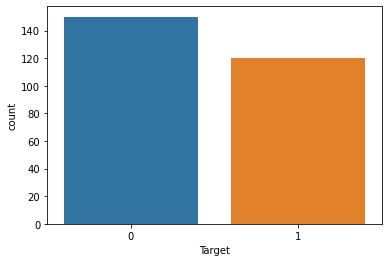

In [13]:
y = dataset["Target"]

sns.countplot(y)


Target_temp = dataset.Target.value_counts()

print(Target_temp)

# Question 1:
Calculate the percentage of the population having heart disease and percentage of population not having heart disease.

In [14]:
print("Percentage of patients without heart problems: "+str(round(Target_temp[0]*100/270,2)))
print("Percentage of patients with heart problems: "+str(round(Target_temp[1]*100/270,2)))


Percentage of patients without heart problems: 55.56
Percentage of patients with heart problems: 44.44


# Analysing the 'Sex' attribute

In [15]:
dataset["Sex"].unique()

array([1, 0], dtype=int64)

# Question 2:
With the help of the dataset given ,
Find out and plot the graph for among the males and females,who are suffering with heart problems more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Target'>

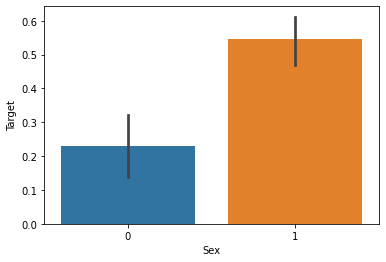

In [16]:
sns.barplot(dataset["Sex"],y)

# Analysing the 'Chest pain type' attribute

In [17]:
dataset["ChestpainType"].unique()

array([4, 3, 2, 1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestpainType', ylabel='Target'>

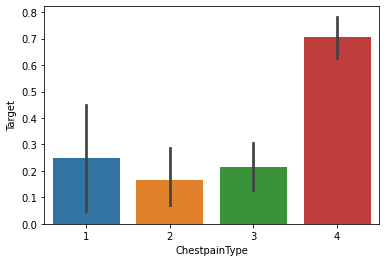

In [21]:
sns.barplot(dataset["ChestpainType"],y)

#We notice, that chest pain of '4', i.e. the ones with asymptotic are more likely to have heart problems.

In [22]:
dataset["Thallium"].unique()

array([3, 7, 6], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Thallium', ylabel='Target'>

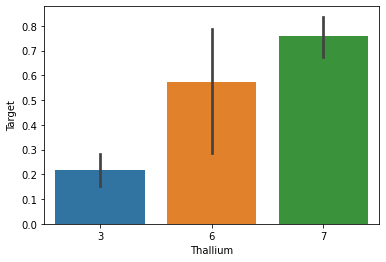

In [23]:
sns.barplot(dataset["Thallium"],y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thallium', ylabel='Density'>

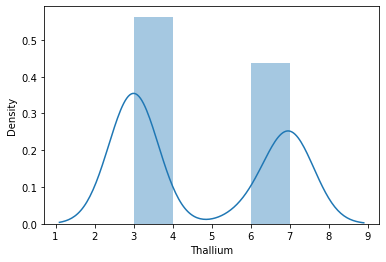

In [24]:
sns.distplot(dataset["Thallium"])

# Question 3:
    With the given dataset, plot the graph for age vs bp and find out which age group more likely to have more bp?


<AxesSubplot:xlabel='Age', ylabel='BP'>

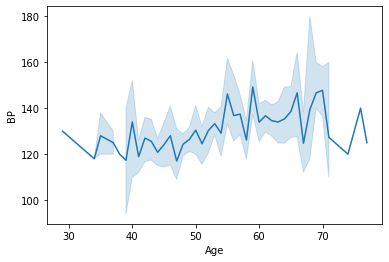

In [28]:
sns.lineplot(x=dataset['Age'],y=dataset['BP'],data=dataset)

# Question 4:
    With the given dataset, plot the graph for sex vs cholesterol and find out which gender more likely to have cholesterol?
    

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

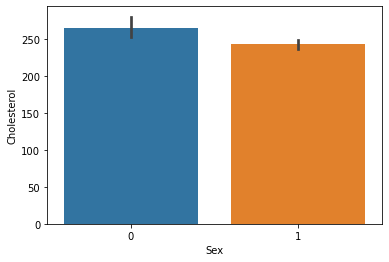

In [29]:
sns.barplot(x=dataset['Sex'],y=dataset['Cholesterol'],data=dataset)

# Question 5:
       From the dataset,plot ST Depression vs age graph and analyse the result.

<AxesSubplot:xlabel='Age', ylabel='Stdepression'>

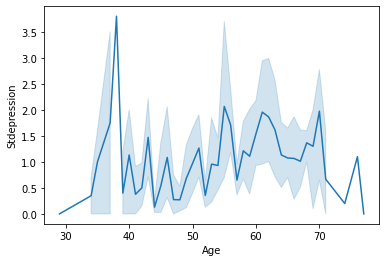

In [32]:
sns.lineplot(x=dataset['Age'],y=dataset['Stdepression'],data=dataset)

# Question 6:
       From the dataset,plot Exercise Angima vs Heart Disease graph and analyse the result.
    

<AxesSubplot:xlabel='Target', ylabel='ExerciseAngina'>

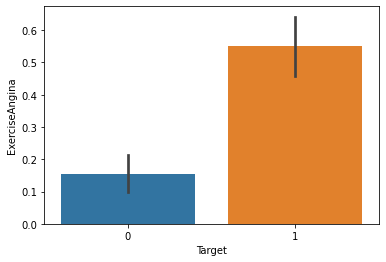

In [33]:
sns.barplot(x=dataset['Target'],y=dataset['ExerciseAngina'],data=dataset)

# Question 7:
    Plot heatmap for the correlation data of the given dataset.

<AxesSubplot:>

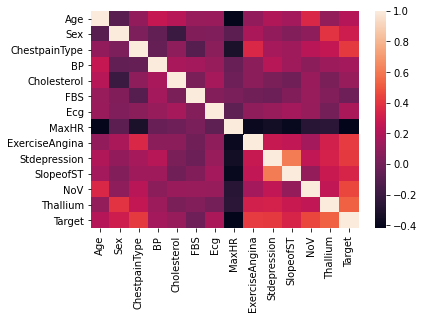

In [35]:
sns.heatmap(dataset.corr())

# Splitting dataset into training and testing dataset

In [37]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Target",axis=1)
Target = dataset["Target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,Target,test_size=0.20,random_state=0)

In [38]:
X_train.shape

(216, 13)

In [39]:
X_test.shape

(54, 13)

In [40]:
Y_train.shape

(216,)

In [41]:
Y_test.shape

(54,)

# Model Fitting

In [42]:
from sklearn.metrics import accuracy_score

# Question 8:
    Find Accuracy score of test dataset using Decision Tree:

In [43]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [44]:
print(Y_pred_dt.shape)

(54,)


In [45]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 85.19 %


# Question 9:
    Find the Accuracy Score of the test dataset using Naive Bayes.
    

In [46]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [47]:
Y_pred_nb.shape

(54,)

In [48]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 74.07 %


# Question 10:
    Find the Accuracy score of the test dataset using K Nearest Neighbors.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [51]:
Y_pred_knn.shape

(54,)

In [52]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 62.96 %


# Comparing the Accuracy scores of different algorithms used.

In [54]:
scores = [score_dt,score_nb,score_knn]
algorithms = ["Decision Tree","Naive Bayes","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Decision Tree is: 85.19 %
The accuracy score achieved using Naive Bayes is: 74.07 %
The accuracy score achieved using K-Nearest Neighbors is: 62.96 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

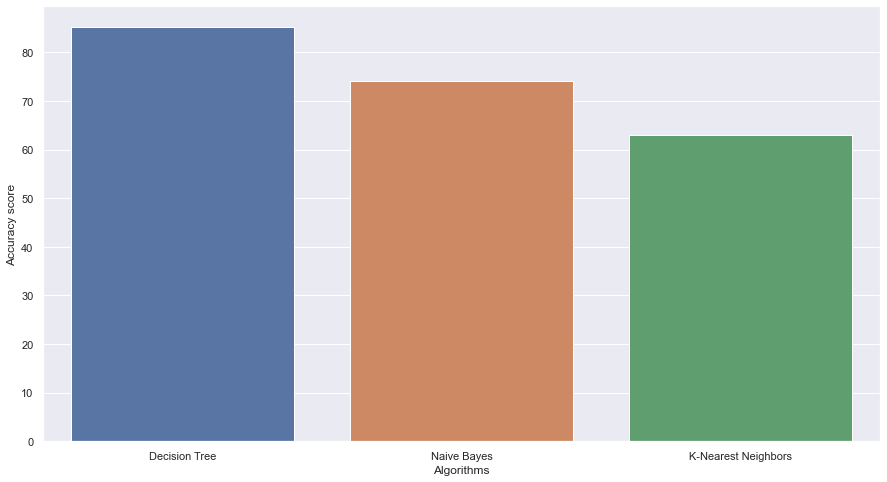

In [57]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
